<a href="https://colab.research.google.com/github/amirli21/tensorflow-learning-examples/blob/main/tf_fundamentals_example_solution_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow fundamentals 

# Classification example notebook

**Useful links**

Learn more about [google colab](https://www.jcchouinard.com/google-colab-with-python/)

*See help section* : CMD/CTRL M + h

*See pandas display options* : https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

*`pandas.Series.plot()` documentation* : https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html

General information for data science(used it for visualization) : https://inferentialthinking.com/chapters/intro.html

Normality test : https://www.statology.org/normality-test-python/

General information for data science : https://www.statology.org

Apply change to the column : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

More about *`pandas.Series.value_counts()`* : https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

More about boolean masks for `pandas.DataFrame`s : https://stackoverflow.com/questions/38802675/create-bool-mask-from-filter-results-in-pandas

More about **loan grading** : https://www.investopedia.com/terms/l/loan-grading.asp

Plotting `pandas.Series` with **seaborn** : https://stackoverflow.com/questions/46793448/plotting-series-using-seaborn

## Before we begin

### Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The `loan_status` column contains our label.

#### Data Overview


----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
data_folder = '/content/drive/MyDrive/DATA/'
info_path = 'lending_club_info.csv'
data_path = 'lending_club_loan_two.csv'

## Loading the data and other imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # to handle warnings
from scipy.stats import shapiro
import random
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# we'll look at the classification report, since data is imbalanced
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ann
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
%matplotlib inline

palettes = [
    'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
    'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
    'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
    'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn',
    'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
    'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r',
    'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu',
    'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
    'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 
    'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
    'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r',
    'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary','binary_r',
    'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r',
    'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix',
    'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r',
    'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
    'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
    'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
    'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'
]

In [3]:
info_df = pd.read_csv(data_folder + info_path, index_col='LoanStatNew')

data = pd.read_csv(data_folder + data_path)

## EDA and Data Preprocessing

In [4]:
def get_col_description(col_name:str) -> None:
  print()
  try:
    print(f'Column name: {col_name}')
    print()
    print(f'Data type of the column: {data[col_name].dtype}')
    print()
    description = info_df.loc[col_name]["Description"]
    if len(description) > 122:
      print(f'Column information: {description[:122]}')
      print()
      print(f'                   {description[122:]}')
    else:
      print(f'Column information: {description}')
    print()
  except KeyError:
    print(f'{col_name} is not presented in the dataframe')
    print()


In [5]:
col_names = list(data.columns)

<a name='data_info'></a>
### DATA INFORMATION

In [6]:
print('DATA INFORMATION'.center(150, '-'))
for col in col_names:
  get_col_description(col)
  print("*" * 150)

-------------------------------------------------------------------DATA INFORMATION-------------------------------------------------------------------

Column name: loan_amnt

Data type of the column: float64

Column information: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loa

                   n amount, then it will be reflected in this value.

******************************************************************************************************************************************************

Column name: term

Data type of the column: object

Column information: The number of payments on the loan. Values are in months and can be either 36 or 60.

******************************************************************************************************************************************************

Column name: int_rate

Data type of the column: float64

Column information: Interest Rate on the loan

*********

In [7]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### EDA for Single Columns

For information refer to [DATA INFORMATION](#data_info)

#### loan_amnt column

In [9]:
data['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

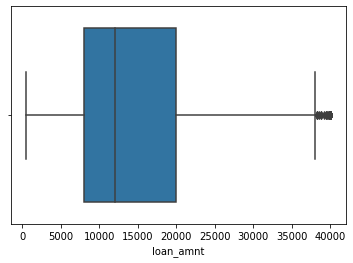

In [10]:
sns.boxplot(data['loan_amnt'])

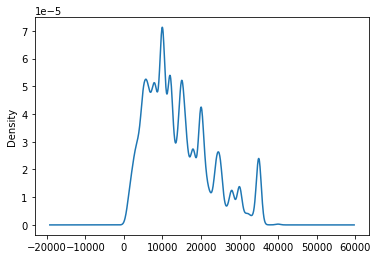

In [11]:
# we have some outliers
data['loan_amnt'].plot(kind='density');

(array([1.3630e+04, 4.0597e+04, 4.4211e+04, 6.7675e+04, 4.3817e+04,
        4.2762e+04, 2.4116e+04, 3.9226e+04, 1.4231e+04, 2.4346e+04,
        5.5190e+03, 1.5436e+04, 3.4080e+03, 1.6795e+04, 6.5000e+01,
        1.9600e+02]),
 array([  500.  ,  2968.75,  5437.5 ,  7906.25, 10375.  , 12843.75,
        15312.5 , 17781.25, 20250.  , 22718.75, 25187.5 , 27656.25,
        30125.  , 32593.75, 35062.5 , 37531.25, 40000.  ]),
 <a list of 16 Patch objects>)

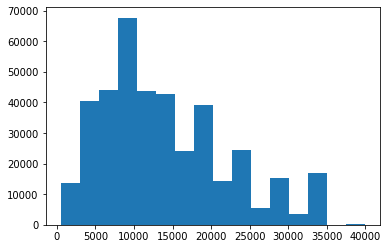

In [12]:
plt.hist(data['loan_amnt'], bins=16) # data is skewed to the right, may be this column will need normalization

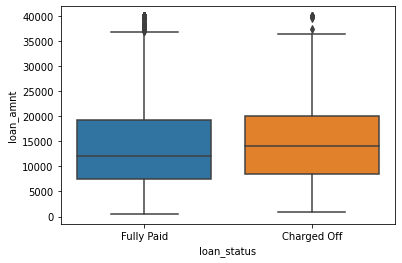

In [13]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data)

In [14]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
# test the normality, p-value close to 0, data doesn't come from normal distribution



shapiro(data['loan_amnt'])

ShapiroResult(statistic=0.9391361474990845, pvalue=0.0)

#### term column

In [16]:
data['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [17]:
# we can apply the column transformation to this column, since 36 and 60 are numerical values and can have effects on the target

def get_months(value):
  return int(value[:3])

In [18]:
data['term'] = data['term'].map(get_months)

In [19]:
data['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

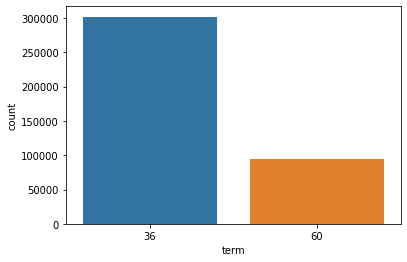

In [20]:
sns.countplot(data['term'])

#### int_rate column

In [21]:
get_col_description('int_rate')


Column name: int_rate

Data type of the column: float64

Column information: Interest Rate on the loan



In [22]:
data['int_rate'].describe()

count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64

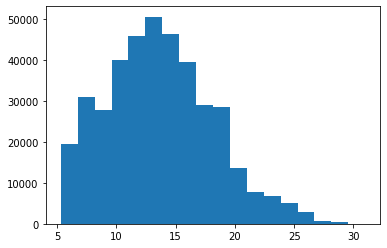

In [23]:
# looks to have a few outliers since mean and median are near, we'll see

plt.hist(data['int_rate'], bins=18);

In [ ]:
data['int_rate'].plot(kind='kde')

In [ ]:
sns.boxplot(data['int_rate']);

In [ ]:
data['int_rate'].value_counts(bins= [i for i in range(0, 40, 5)], sort=False)

In [ ]:
shapiro(data['int_rate']) # data doesn't come from a normal distribution

#### installment column

In [ ]:
get_col_description('installment')

In [ ]:
data['installment'].describe()

In [ ]:
plt.hist(data['installment']);

In [ ]:
sns.boxplot(data['installment']); # we have some outliers, and we can say roughly that data doesn't come from a normal distribution

In [ ]:
shapiro(data['installment'])

#### grade column

In [ ]:
get_col_description('grade')

Loan grading is part of a lending institution's loan review or credit risk system and is usually an aspect of the credit underwriting and approval processes.

In [ ]:
grade_values = data['grade'].value_counts().sort_index()

In [ ]:
sns.barplot(grade_values.index, grade_values.values)

In [ ]:
sns.countplot(x='grade', data=data, hue='loan_status', order=[chr(i) for i in range(65, 72)])

#### sub_grade column

In [ ]:
get_col_description('sub_grade')

In [ ]:
plt.figure(figsize=(12, 5))
sub_grade_values = data['sub_grade'].value_counts().sort_index()

sns.barplot(sub_grade_values.index, sub_grade_values.values, palette='coolwarm')

In [ ]:
plt.figure(figsize=(12, 4))

subgrade_order = sorted(data['sub_grade'].unique())

sns.countplot(
    x='sub_grade', data=data, order=subgrade_order,
    palette=random.choice(palettes), hue='loan_status'
)

In [ ]:
f_and_g = data[(data['grade']=='G') | (data['grade']=='F')]



plt.figure(figsize=(12, 4))

subgrade_order = sorted(f_and_g['sub_grade'].unique())

sns.countplot(
    x='sub_grade', data=f_and_g, order=subgrade_order,
    palette=random.choice(palettes), hue='loan_status'
)

In [ ]:
sub_grade_values

#### emp_title column

In [ ]:
get_col_description('emp_title')

In [ ]:
data['emp_title'].nunique()

In [ ]:
# this column has ~17k unique values, and when looking at values, they are very noisy and less informative. I'll simply drop this column

data.drop('emp_title', axis='columns', inplace=True)

In [ ]:
data.shape

#### emp_length column

In [ ]:
get_col_description('emp_length')

In [ ]:
n_null_values = data['emp_length'].isna().sum()

print('There are {} null values in the "emp_length" column.'.format(n_null_values))

In [ ]:
n_unique_values = data['emp_length'].nunique()

print('There are {} unique values in the "emp_length" column.'.format(n_unique_values))

In [ ]:
data['emp_length'].value_counts()

In [ ]:
pd.DataFrame(data['emp_length']).head(20).loc[0][0].split()

In [ ]:
def convert(col_value):
  value = 0
  split_value = col_value.split()
  n_of_words = len(split_value)
  if n_of_words == 2:
    if split_value[0] == '10+':
      value = 11
    else:
      value = int(split_value[0])
  else:
    value = 0
  return value


In [ ]:
data['emp_length'] = data['emp_length'].map(convert, na_action='ignore')

In [ ]:
data['emp_length'].value_counts()

In [ ]:


sns.countplot(data['emp_length'], palette='gnuplot2_r')

In [ ]:
# Is this column useful?

emp_co = data[data['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

emp_fp = data[data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

emp_len = emp_co / emp_fp

emp_len

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data, order=[float(i) for i in range(0, 12)], hue='loan_status')

In [ ]:
# charge off rates are extremely similar accross all columns, I'll drop this column too

data.drop('emp_length', axis='columns', inplace=True)

#### home_ownership column

In [ ]:
get_col_description('home_ownership')

In [ ]:
data['home_ownership'].value_counts()

In [ ]:
data['home_ownership'].isnull().sum()

In [ ]:
def change(value):
  if value == 'NONE' or value == 'ANY':
    value = 'OTHER'
  return value
data['home_ownership'] = data['home_ownership'].map(change)


data['home_ownership'].value_counts()

In [ ]:
sns.countplot(data['home_ownership'], palette=random.choice(palettes))

#### annual_inc column

In [ ]:
get_col_description('annual_inc')

In [ ]:
data['annual_inc'].describe()

In [ ]:
data['annual_inc'].plot(kind='kde')

In [ ]:
data['annual_inc'].isnull().sum()

In [ ]:
plt.xscale('log')
sns.boxplot(data['annual_inc'])

In [ ]:
shapiro(data['annual_inc'])

In [ ]:
# data is not normal
data['annual_inc'].describe(percentiles=[i / 20 for i in range(0, 21)])

In [ ]:
data['annual_inc'].min()

In [ ]:
data['annual_inc'].max()

In [ ]:
len(data[data['annual_inc'] < 1e3])

In [ ]:
def get_monthly_income(annual_income):
  return annual_income / 12



data['monthly_income'] = data['annual_inc'].map(get_monthly_income)

data.drop('annual_inc', axis='columns', inplace=True)

In [ ]:
data['monthly_income'].describe()

In [ ]:
plt.xscale('log')
sns.boxplot(data['monthly_income'])

#### verification_status column

In [ ]:
get_col_description('verification_status')

In [ ]:
data['verification_status'].nunique()

In [ ]:
data['verification_status'].value_counts()

In [ ]:
status = {'Not Verified' : 0, 'Verified' : 1, 'Source Verified' : 2}

data['verification_status'] = data['verification_status'].map(status)


data['verification_status'].value_counts().sort_index()

#### Last touches

In [ ]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

### Data PreProcessing

In [ ]:
len(data)

In [ ]:
data.isnull().sum()

In [ ]:
data['loan_status'].value_counts()

In [ ]:
data.isnull().sum() / len(data) * 100.0

In [ ]:
# correlations

plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [ ]:
# dealing with missing data

data['purpose'].head()

In [ ]:
data['title'].head(10)

In [ ]:
data['title'].value_counts()

In [ ]:
data.drop('title', axis='columns', inplace=True)

In [ ]:
data['mort_acc'].value_counts()

In [ ]:
data.corr()['mort_acc'].sort_values()

In [ ]:
total_acc_avg = data.groupby('total_acc')['mort_acc'].mean()

In [ ]:
def fill_mort_acc(total_acc, mort_acc):

  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  return mort_acc

In [ ]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis='columns')

In [ ]:
data.dropna(axis='columns', inplace=True)

In [ ]:
len(data)

In [ ]:
data.isnull().sum()

In [ ]:
data.select_dtypes(['object']).columns

In [ ]:
data.drop('grade', axis='columns', inplace=True)

In [ ]:
# sub_grade into dummy variables

dummies = pd.get_dummies(data['sub_grade'], drop_first=True)

data = pd.concat([data.drop('sub_grade', axis='columns'), dummies], axis='columns')

In [ ]:
data.head()

In [ ]:
def dummies_df(columns, df=data):
  for column in columns:
    dummies = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([df.drop(column, axis='columns'), dummies], axis='columns')
  del dummies
  return df

In [ ]:
data['purpose'].value_counts()

In [ ]:
data = dummies_df(('verification_status', 'application_type', 'initial_list_status', 'purpose'), df=data)

In [ ]:
data['home_ownership'].value_counts()

In [ ]:
data = dummies_df(['home_ownership'], df=data)

In [ ]:
data['zip_code'] = data['address'].map(lambda x:x[-5:])

In [ ]:
data['zip_code'].value_counts()

In [ ]:
data.drop('address', axis='columns', inplace=True)

data = dummies_df(['zip_code'], df=data)

In [ ]:
data.drop('issue_d', axis='columns', inplace=True)

In [ ]:
data['earliest_cr_year'] = data['earliest_cr_line'].map(lambda x: int(x[-4:]))

In [ ]:
data.drop('earliest_cr_line', axis='columns', inplace=True)

In [ ]:
## modelling phase

data.drop('loan_status', axis='columns', inplace=True)


X = data.drop('loan_repaid', axis='columns')
y = data['loan_repaid']

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)
print('SVC score: ')
svc.score(X_test, y_test)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='all')

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

disp.plot()

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

print('Logistic regression score: ', log_reg.score(X_test, y_test))

In [ ]:
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='all')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

disp.plot()

In [ ]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

print('Gradient Boosting classifier: ', gbc.score(X_test, y_test))

In [ ]:
y_pred = gbc.predict(X_test)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='all')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)

In [ ]:
disp.plot()

In [ ]:
model = Sequential()

model.add(Dense(80, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(35, activation='relu'))
model.add(Dropout(.3))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))